<img style="float: left;" src="earth-lab-logo-rgb.png" width="150" height="150" />

# Earth Analytics Education - EA  Python Course Spring 2021

## Important  - Assignment Guidelines

1. Before you submit your assignment to GitHub, make sure to run the entire notebook with a fresh kernel. To do this first, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart & Run All)
2. Always replace the `raise NotImplementedError()` code with your code that addresses the activity challenge. If you don't replace that code, your notebook will not run.

```
# YOUR CODE HERE
raise NotImplementedError()
```

3. Any open ended questions will have a "YOUR ANSWER HERE" within a markdown cell. Replace that text with your answer also formatted using Markdown.
4. **DO NOT RENAME THIS NOTEBOOK File!** If the file name changes, the autograder will not grade your assignment properly.
6. When you create a figure, comment out `plt.show()` to ensure the autograder can grade your plots. For figure cells, DO NOT DELETE the code that says `DO NOT REMOVE LINE BELOW`.

```
### DO NOT REMOVE LINE BELOW ###
student_plot1_ax = nb.convert_axes(plt)
```

* Only include the package imports, code, and outputs that are required to run your homework assignment.
* Be sure that your code can be run on any operating system. This means that:
   1. the data should be downloaded in the notebook to ensure it's reproducible
   2. all paths should be created dynamically using the `os.path.join`

## Follow to PEP 8 Syntax Guidelines & Documentation

* Run the `autopep8` tool on all cells prior to submitting (HINT: hit shift + the tool to run it on all cells at once!
* Use clear and expressive names for variables. 
* Organize your code to support readability.
* Check for code line length
* Use comments and white space sparingly where it is needed
* Make sure all python imports are at the top of your notebook and follow PEP 8 order conventions
* Spell check your Notebook before submitting it.

For all of the plots below, be sure to do the following:

* Make sure each plot has a clear TITLE and, where appropriate, label the x and y axes. Be sure to include UNITS in your labels.


### Add Your Name Below 
**Your Name: Christian Haselwimmer**

<img style="float: left;" src="colored-bar.png"/>

---

# Week 04 and 05 Homework - Automate NDVI Workflow

For this assignment, you will write code to generate a plot of the mean normalized difference vegetation index (NDVI) for two different sites in the United States across one year of data:

* San Joaquin Experimental Range (SJER) in Southern California, United States
* Harvard Forest (HARV) in the Northeastern United States

The data that you will use for this week is available from **earthpy** using the following download: 

`et.data.get_data('ndvi-automation')`

## Assignment Goals

Your goal in this assignment is to create the most efficient and concise workflow that you can that allows for:

1. The code to scale if you added new sites or more time periods to the analysis.
2. Someone else to understand your workflow.
3. The LEAST and most efficient (i.e. runs fast, minimize repetition) amount of code that completes the task.

### HINTS

* Remove values outside of the landsat valid range of values as specified in the metadata, as needed.
* Keep any output files SEPARATE FROM input files. Outputs should be created in an outputs directory that is created in the code (if needed) and/or tested for.
* Use the functions that we demonstrated during class to make your workflow more efficient.
* BONUS - if you  chose - you can export your data as a csv file. You will get bonus points for doing this.


## Assignment Requirements

Your submission to the GitHub repository should include:
* This Jupyter Notebook file (.ipynb) with:
    * The code to create a plot of mean NDVI across a year for  2 NEON Field Sites:
        * NDVI on the x axis and formatted dates on the y for both NEON sites on one figure/axis object
    * The **data should be cleaned to remove the influence of clouds**. See the [earthdatascience website for an example of what your plot might look like with and without removal of clouds](https://www.earthdatascience.org/courses/earth-analytics-python/create-efficient-data-workflows/).
* BONUS: Create one output `.csv` file that has 3 columns - NDVI, Date and Site Name - with values for SJER and HARV.

Your notebook should:
* Have *at least* 2 well documented and well named functions with docstrings.
* Include a Markdown cell at the top of the notebook that outlines the overall workflow using pseudocode (i.e. plain language, not code)
* Include additional Markdown cells throughout the notebook to describe: 
    * the data that you used - and where it is from
    * how data are being processing
    * how the code is optimized to run fast and be more concise

# Replace this cell with your pseudocode  for this workflow

If you happen to be a diagram person a diagram is ok too



## Pseudocode
1. Query input directory and build list of sites (in this case SJER and HARV) from top level directories
2. Create placeholder list to store data for each site
3. Loop through each site/directory and:
   - Create empty site specific dataframe with required columns
   - Open the sites bounding vector as a geodataframe
   - Build list of available Landsat scenes within the site directory
   - Loop through the list of Landsat scenes and for each Landsat scene:
     - Get paths for bands 4 & 5 and for the QA data
     - Open bands 4 & 5 using the bounding extent and calculate NDVI
     - Open the QA data and use to mask the NDVI result
     - Calculate average NDVI value from masked result and populate dataframe with the value
   - Append the site specific dataframe to the list
4. Concatenate the list items into a single dataframe
5. Create plots

In [1]:
# Autograding imports - do not modify this cell
import matplotcheck.autograde as ag
import matplotcheck.notebook as nb
import matplotcheck.timeseries as ts
from datetime import datetime

In [2]:
# Import needed packages in PEP 8 order
# and no unused imports listed (10 points total)

import os
from glob import glob

import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import geopandas as gpd
import numpy as np
import xarray as xr
import rioxarray as rxr
import earthpy as et
import seaborn as sns

# Get data
et.data.get_data('ndvi-automation')

# Set working directory
os.chdir(os.path.join(et.io.HOME,
                      'earth-analytics',
                      'data'))

# Setting consistent plotting style throughout notebook
sns.set_style("white")
sns.set(font_scale=1.5)

In [3]:
# DO NOT MODIFY THIS CELL
# Tests that the working directory is set to earth-analytics/data

path = os.path.normpath(os.getcwd())
student_wd_parts = path.split(os.sep)

if student_wd_parts[-2:] == ['earth-analytics', 'data']:
    print("\u2705 Great - it looks like your working directory is set correctly to ~/earth-analytics/data")
else:
    print("\u274C Oops, the autograder will not run unless your working directory is set to earth-analytics/data")

✅ Great - it looks like your working directory is set correctly to ~/earth-analytics/data


# Figure 1: Plot 1 - Mean NDVI For Each Site Across the Year (50 points)

Create a plot of the mean normalized difference vegetation index (NDVI) for the two different sites in the United States across the year: 

* NDVI on the x axis and formatted dates on the y for both NEON sites on one figure/axis object.
* Each site should be identified with a different color in the plot and legend.
* The final plot **data should be cleaned to remove the influence of clouds**.
* Be sure to include appropriate title and axes labels.

Add additional cells as needed for processing data (e.g. defining functions, etc), but be sure to:
* follow the instructions in the code cells that have been provided to ensure that you are able to use the sanity check tests that are provided. 
* include only the plot code in the cell identified for the final plot code below

## Task 1: 

In the cell below, create a single dataframe containing MEAN NDVI, the site name, 
and the date of the data for the HARV site 
scene `HARV/landsat-crop/LC080130302017031701T1-SC20181023151837`.  The column names for the  final
DataFrame should be`mean_ndvi`, and `site`, and the data should be **indexed on the date**. 

Use the functions that we reviewed in class (or create your own versions of them) to implement your code

### In the Cell below Place  All Functions Needed to Run this Notebook (20 points)

In [4]:
### DO NOT REMOVE THIS LINE OR EDIT / MOVE THIS CELL ###
start_time = datetime.now()

In [5]:
# In this cell place all of the functions needed to run your notebook
# You will be graded here on function application, docstrings, efficiency so ensure
# All functions are placed here!

#  Function to open a Landsat band for a specific geographic bounds
def open_clean_bands(band_path,
                     crop_extent,
                     valid_range=None):
    """Opens a Landsat band and returns data for a specific geographic bounds with the
    option to enforce a valid data range.

    Parameters
    -----------
    band_path : string
        A path to the array to be opened
    crop_extent: geopandas GeoDataFrame
        A geopandas dataframe to be used to crop the raster data using rasterio mask().
    valid_range : tuple (optional)
        A tuple of min and max range of values for the data. Default = None

    Returns
    -----------
    band : xarray DataArray
        An xarray DataArray with the band values
    """
    band = rxr.open_rasterio(band_path, masked=True).rio.clip(crop_extent.geometry,
                                                              from_disk=True).squeeze()
    # Only run this step if a valid range tuple is provided
    if valid_range:
        mask = ((band < valid_range[0]) | (band > valid_range[1]))
        band = band.where(~xr.where(mask, True, False))

    return band


# Function to calculate average NDVI value
def mask_crop_ndvi(all_bands,
                   crop_extent,
                   pixel_qa_path,
                   vals):
    """Calculates an average NDVI value from Landsat bands 4 and 5 for a specific geographic
    extent using the Landsat cloud mask to remove anomalous values.

    Parameters
    -----------
    all_bands : list
        A list containing two xarray objects for landsat bands 4 and  5
    crop_extent: geopandas GeoDataFrame
        A geopandas dataframe to be used to crop the raster data using rasterio mask().
    pixel_qa_path: string
        A path to a pixel qa tif file.
    vals: list
        A list of values needed to create the cloud mask


    Returns
    -----------
    ndvi_mean : float
        Mean NDVI value
    """

    # crop_json = crop_bound.geometry

    # Open and clip qa layer
    # pixel_qa = rxr.open_rasterio(pixel_qa_path[0], masked=True).rio.clip(crop_json,
    #                                                            from_disk = True).squeeze()

    # Open and clip qa layer
    pixel_qa = rxr.open_rasterio(pixel_qa_path[0], masked=True).rio.clip(crop_extent.geometry,
                                                                         from_disk=True).squeeze()

    # Calculate NDVI
    ndvi_xr = (all_bands[1]-all_bands[0]) / (all_bands[1]+all_bands[0])

    # Apply cloud mask to NDVI
    ndvi_mask = ndvi_xr.where(~pixel_qa.isin(vals))
    
    # Calculate mean NDVI value
    ndvi_mean = np.nanmean(ndvi_mask)
    
    return ndvi_mean

## Script to calculate mean NDVI for a single Landsat 8 scene
The script below will calculate the average NDVI value from Bands 4 and 5 of Landsat 8 data for a single scene.

In [6]:
# Create dataframe of mean NDVI in this cell using the functions created above
# Important: to use the ungraded tests below as a sanity check,
# name your columns: mean_ndvi and site
# Call the dataframe at the end of the cell so the tests run on it!
# Be sure that the date column is an index of type date
# HINT: the time series lessons may help you remember how to do this!

# Define site name
site_name = "HARV"

# Define site path
site = os.path.join("ndvi-automation", "sites", site_name)

# Geographic bounds
# Open up the shapefile for clipping your landsat data to the study area
vector_dir = os.path.join(site, "vector")

# Open crop boundary
site_boundary_path = os.path.join(vector_dir,  site_name + "-crop.shp")
crop_extent = gpd.read_file(site_boundary_path)


# Landsat bands
# Select just a single directory and grab bands 4-5 from the directory
adir = os.path.join(site, "landsat-crop",
                    "LC080130302017031701T1-SC20181023151837")

# Define bands paths
band_paths = sorted(glob(os.path.join(adir, "*band*[4-5].tif")))

# Open the bands and append into Xarray
all_bands = []
for aband in band_paths:
    print("Opening up", aband)
    cleaned_band = open_clean_bands(band_path=aband,
                                    crop_extent=crop_extent,
                                    valid_range=(0, 10000))
    all_bands.append(cleaned_band)


# QA dataset
# Cloud no data vals for Landsat 8 -
vals = [328, 392, 840, 904, 1350, 352, 368, 416,
        432, 480, 864, 880, 928, 944, 992, 480, 992]

# Open cloud mask layer
pixel_qa_path = glob(os.path.join(adir, "*qa*"))


# Calculate mean NDVI
site_NDVI = mask_crop_ndvi(all_bands=all_bands,
                           crop_extent=crop_extent,
                           pixel_qa_path=pixel_qa_path,
                           vals=vals)

# Extract the date from the Landsat directory name
path_components = adir.split(os.sep)
dir_name = path_components[4]
date = dir_name[10:18]
date

# Create the summary dataframe
ndvi_list = []
ndvi_list.append([site_name, date, site_NDVI])
ndvi_df = pd.DataFrame(ndvi_list,
                       columns=["site", "date", "mean_ndvi"])

# convert the 'Date' column to datetime format
ndvi_df['date']= pd.to_datetime(ndvi_df['date'])
ndvi_df.set_index("date", inplace=True)
ndvi_df

Opening up ndvi-automation\sites\HARV\landsat-crop\LC080130302017031701T1-SC20181023151837\LC08_L1TP_013030_20170317_20170328_01_T1_sr_band4.tif
Opening up ndvi-automation\sites\HARV\landsat-crop\LC080130302017031701T1-SC20181023151837\LC08_L1TP_013030_20170317_20170328_01_T1_sr_band5.tif


,site,mean_ndvi
date,,
2017-03-17,HARV,0.281132


In [7]:
# This cell  is testing your data output above

student_ndvi_ts_single_site = _

single_scene_points = 0

# Ensure the data is stored in a dataframe.
if isinstance(student_ndvi_ts_single_site, pd.DataFrame):
    print('\u2705 Your data is stored in a DataFrame!')
    single_scene_points += 1
else:
    print('\u274C It appears your data is not stored in a DataFrame. ',
          'To see what type of object your data is stored in, check its type with type(object)')

# Ensure that the date column is the index
if isinstance(student_ndvi_ts_single_site.index, pd.core.indexes.datetimes.DatetimeIndex):
    print('\u2705 You have the index set to the date column!')
    single_scene_points += 2
else:
    print('\u274C You do not have the index set to the date column.')

# Ensure that the date column is datetime
if isinstance(student_ndvi_ts_single_site.index[0], pd._libs.tslibs.timestamps.Timestamp):
    print('\u2705 The data in your date column is datetime!')
    single_scene_points += 2
else:
    print('\u274C The data in your date column is not datetime.')

# Ensure the site name is correct
if student_ndvi_ts_single_site.site.values[0] == 'HARV':
    print('\u2705 You have the correct site name!')
    single_scene_points += 5
else:
    print('\u274C You do not have the correct site name.')

if np.allclose(0.281131628228094, student_ndvi_ts_single_site.mean_ndvi.values[0]):
    print('\u2705 You have the correct mean NDVI value!')
    single_scene_points += 5
else:
    print('\u274C You do not have the correct mean ndvi value.')

print("\n \u27A1 You received {} out of 15 points for creating a dataframe.".format(
    single_scene_points))
single_scene_points

✅ Your data is stored in a DataFrame!
✅ You have the index set to the date column!
✅ The data in your date column is datetime!
✅ You have the correct site name!
✅ You have the correct mean NDVI value!

 ➡ You received 15 out of 15 points for creating a dataframe.


15

## Task 2:

In the cell below, process all of the landsat scenes. Create a DataFrame that contains the following 
information for each scene


|   | index  | site  | mean_ndvi  | 
|---|---|---|---|
| Date  |   |   |   |
|  2017-01-07  | 0  | SJER  | .4  |  

Be sure to call your dataframe at the end of the cell to ensure autograding works.
HINT: FOR THIS STEP, leave any rows containing missing values (`NAN`).

## Script to calculate average NDVI values from multiple NEON sites and Landsat 8 scenes
This script searches through a specified directory for NEON sites and then calculates the average NDVI values for Landsat 8 datasets associated with these sites. The Landsat 8 data includes acquisitions for the year 2017. 

In [8]:
# Create dataframe of NDVI including the cleaning data to deal with clouds

# Important: to use the ungraded tests below as a sanity check,
# name your columns: mean_ndvi and site
# Don't forget to set date as the index and make the values of type datetime

# Get list of sites
all_sites = glob(os.path.join("ndvi-automation", "sites", "*/"))

# Define the directory name where the Landsat directories are stored
landsat_dir = "landsat-crop"

# Define cloud no data vals for Landsat 8 -
vals = [328, 392, 840, 904, 1350, 352, 368, 416,
        432, 480, 864, 880, 928, 944, 992, 480, 992]

# Placeholder list to store the NDVI data
ndvi_list = []

# Loop through the sites
for site in all_sites:

    # Get the site name
    path_components = site.split(os.sep)
    site_name = path_components[2]

    # Open up the site extents shapefile to clip Landsat data
    vector_dir = os.path.join(site, "vector")

    # Open crop boundary
    site_boundary_path = os.path.join(vector_dir,  site_name + "-crop.shp")
    crop_extent = gpd.read_file(site_boundary_path)

    # Get a list of the Landsat sub-directories
    new_path = os.path.join(site, landsat_dir)
    all_dirs = glob(new_path + "/*/")

    #  Loop through  each Landsat subdirectory
    for adir in all_dirs:

        # Define Landsat bands paths
        band_paths = sorted(glob(os.path.join(adir, "*band*[4-5].tif")))

        # Open the bands and append into Xarray
        all_bands = []
        for aband in band_paths:
            cleaned_band = open_clean_bands(band_path=aband,
                                            crop_extent=crop_extent,
                                            valid_range=(0, 10000))
            all_bands.append(cleaned_band)

        # Open cloud mask layer
        pixel_qa_path = glob(os.path.join(adir, "*qa*"))

        # Calculate mean NDVI
        site_NDVI = mask_crop_ndvi(all_bands=all_bands,
                                   crop_extent=crop_extent,
                                   pixel_qa_path=pixel_qa_path,
                                   vals=vals)
        
        # Extract the date from the Landsat directory name
        path_components = adir.split(os.sep)
        dir_name = path_components[4]
        date = dir_name[10:18]
        
        # Append values to the list
        ndvi_list.append([site_name, date, site_NDVI])
        
# Format the NDVI data
ndvi_df = pd.DataFrame(ndvi_list,
                       columns=["site", "date", "mean_ndvi"])

# Convert the 'Date' column to datetime format
ndvi_df['date']= pd.to_datetime(ndvi_df['date'])
ndvi_df.set_index("date", inplace=True)

# Export the df as a CSV file
output_path = os.path.join("ndvi-automation", "landsat_ndvi.csv")
ndvi_df.to_csv(output_path, index=True, header=True)

ndvi_df

C:\Users\ekqo\Miniconda3\envs\earth-analytics-python\lib\site-packages\ipykernel_launcher.py:79: RuntimeWarning: Mean of empty slice
C:\Users\ekqo\Miniconda3\envs\earth-analytics-python\lib\site-packages\ipykernel_launcher.py:79: RuntimeWarning: Mean of empty slice
C:\Users\ekqo\Miniconda3\envs\earth-analytics-python\lib\site-packages\ipykernel_launcher.py:79: RuntimeWarning: Mean of empty slice
C:\Users\ekqo\Miniconda3\envs\earth-analytics-python\lib\site-packages\ipykernel_launcher.py:79: RuntimeWarning: Mean of empty slice
C:\Users\ekqo\Miniconda3\envs\earth-analytics-python\lib\site-packages\ipykernel_launcher.py:79: RuntimeWarning: Mean of empty slice
C:\Users\ekqo\Miniconda3\envs\earth-analytics-python\lib\site-packages\ipykernel_launcher.py:79: RuntimeWarning: Mean of empty slice
C:\Users\ekqo\Miniconda3\envs\earth-analytics-python\lib\site-packages\ipykernel_launcher.py:79: RuntimeWarning: Mean of empty slice
C:\Users\ekqo\Miniconda3\envs\earth-analytics-python\lib\site-package

,site,mean_ndvi
date,,
2017-01-12,HARV,NaN
2017-01-28,HARV,NaN
2017-02-13,HARV,NaN
2017-03-01,HARV,NaN
2017-03-17,HARV,0.281132
2017-04-02,HARV,0.251133
2017-04-18,HARV,0.541080
2017-05-04,HARV,0.568924
2017-05-20,HARV,0.811310


In [9]:
# Last sanity check before creating your plot (10 points)

# Ensure that you call your dataframe at the bottom of the cell above
# and that it has columns called: mean_ndvi and site

# Ensure the data is stored in a dataframe.
student_ndvi_df = _

df_points = 0

if isinstance(student_ndvi_df, pd.DataFrame):
    print('\u2705 Your data is stored in a DataFrame!')
    df_points +=2
else:
    print('\u274C It appears your data is not stored in a DataFrame. ',
          'To see what type of object your data is stored in, check its type with type(object)')

# Check that dataframe contains the appropriate number of NAN values
if student_ndvi_df.mean_ndvi.isna().sum() == 15:
    print('\u2705 Correct number of masked data values!')
    df_points +=2
else:
    print('\u274C The amount of null data in your dataframe is incorrect.')


# Ensure that the date column is the index
if isinstance(student_ndvi_df.index, pd.core.indexes.datetimes.DatetimeIndex):
    print('\u2705 You have the index set to the date column!')
    df_points +=3
else:
    print('\u274C You do not have the index set to the date column.')

# Ensure that the date column is datetime
if isinstance(student_ndvi_df.index[0], pd._libs.tslibs.timestamps.Timestamp):
    print('\u2705 The data in your date column is datetime!')
    df_points +=3
else:
    print('\u274C The data in your date column is not datetime.')

# Output for timer, # DO NOT MODIFY
end_time = datetime.now()
total_time = end_time - start_time
print(
    "Your total run time for processing the data was {0}.".format(total_time))

print("\n \u27A1 You received {} out of 10 points for creating a dataframe.".format(
    df_points))

df_points

✅ Your data is stored in a DataFrame!
✅ Correct number of masked data values!
✅ You have the index set to the date column!
✅ The data in your date column is datetime!
Your total run time for processing the data was 0:00:26.929835.

 ➡ You received 10 out of 10 points for creating a dataframe.


10

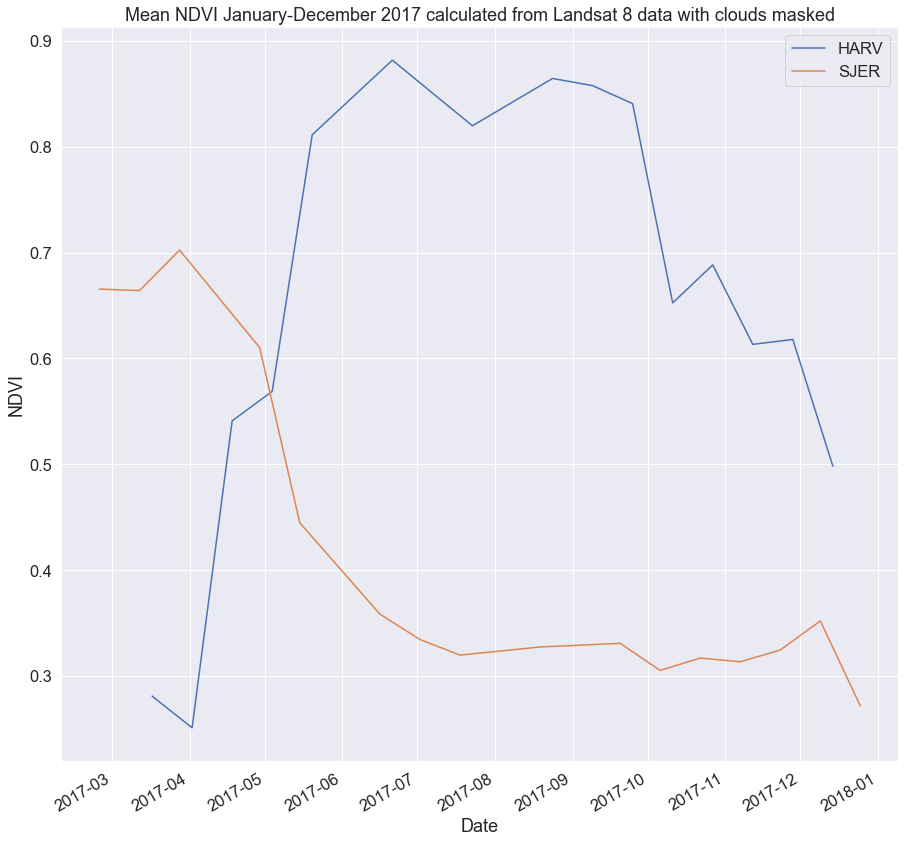

In [10]:
# Add only the plot code to this cell

# This is the final figure of mean NDVI
# for both sites across the year
# with data cleaned to deal with clouds

# Remove NaN rows that represent cloud covered scenes
ndvi_df = ndvi_df.dropna()

fig, ax = plt.subplots(figsize=(15, 15))

sites = ndvi_df.site.unique()
ndvi_df.reset_index().groupby('site').plot(x='date', y='mean_ndvi', ax=ax)
plt.legend(sites)

ax.set(title="Mean NDVI January-December 2017 calculated from Landsat 8 data with clouds masked",
        xlabel="Date",
        ylabel="NDVI")

#plt.show()

### DO NOT REMOVE LINES BELOW ###
final_masked_solution = nb.convert_axes(plt, which_axes="current")

In [11]:
# Ignore this cell for the autograding tests


In [12]:
# Ignore this cell for the autograding tests


# Question 1 (10 points)

Imagine that you are planning NEON’s upcoming flight season to capture remote sensing data in these locations and want to ensure that you fly the area when the vegetation is the most green.

When would you recommend the flights take place for each site? 

Answer the question in 2-3 sentences in the Markdown cell below.

I would recommend for the HARV site that the collection take place towards the end of June and for the SJER site that this take places towards the end of April.

# Question 2 (10 points)

How could you modify your workflow to look at vegetation changes over time in each site? 

Answer the question in 2-3 sentences in the Markdown cell below.

You could look at vegetation change over multiple years for each site by downloading further datasets. For each site you could overlay each years NDVI trends (perhaps by grouping by year) to inspect the variability in NDVI temporal signatures from year to year. This would allow you to more robustly identify the periods of peak greeness.

# Do not edit this cell! (10 points)

The notebook includes:
* additional Markdown cells throughout the notebook to describe: 
    * the data that you used - and where it is from
    * how data are being processing
    * how the code is optimized to run fast and be more concise

# Do not edit this cell! (20 points)

The notebook will also be checked for overall clean code requirements as specified at the **top** of this notebook. Some of these requirements include (review the top cells for more specifics): 

* Notebook begins at cell [1] and runs on any machine in its entirety.
* PEP 8 format is applied throughout (including lengths of comment and code lines).
* No additional code or imports in the notebook that is not needed for the workflow.
* Notebook is fully reproducible. This means:
   * reproducible paths using the os module.
   * data downloaded using code in the notebook.
   * all imports at top of notebook.

## BONUS - Export a  .CSV File to Share (10 points possible)

This is optional - if you export a **.csv** file with the columns specified above: Site, Date and NDVI Value you can get an additional 10 points.

* FULL CREDIT: File exists in csv format and contains the columns specified.
We will check your github repo for this file!
